In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
df1 = pd.read_csv('covid_cases.csv')
df2 = pd.read_csv('covid_cases_age.csv')

# Display the first few rows of each DataFrame
print("Daily COVID-19 Cases by State:")
print(df1.head())

print("\nDaily COVID-19 Cases by Age Group & State:")
print(df2.head())

Daily COVID-19 Cases by State:
         date     state  cases_new  cases_import  cases_recovered  \
0  2020-01-25  Malaysia          4             4                0   
1  2020-01-26  Malaysia          0             0                0   
2  2020-01-27  Malaysia          0             0                0   
3  2020-01-28  Malaysia          0             0                0   
4  2020-01-29  Malaysia          3             3                0   

   cases_active  cases_cluster  
0             4              0  
1             4              0  
2             4              0  
3             4              0  
4             7              0  

Daily COVID-19 Cases by Age Group & State:
         date     state  cases_child  cases_adolescent  cases_adult  \
0  2020-01-25  Malaysia            0                 0            1   
1  2020-01-26  Malaysia            0                 0            0   
2  2020-01-27  Malaysia            0                 0            0   
3  2020-01-28  Malaysia     

In [8]:
# Check the structure of the data
print("\nInfo for Daily COVID-19 Cases by State:")
print(df1.info())

print("\nInfo for Daily COVID-19 Cases by Age Group & State:")
print(df2.info())

# Check column names for df1
print("\nColumn names in df1:")
print(df1.columns)

# Check column names for df2
print("\nColumn names in df2:")
print(df2.columns)


Info for Daily COVID-19 Cases by State:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26554 entries, 0 to 26553
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             26554 non-null  object
 1   state            26554 non-null  object
 2   cases_new        26554 non-null  int64 
 3   cases_import     26554 non-null  int64 
 4   cases_recovered  26554 non-null  int64 
 5   cases_active     26554 non-null  int64 
 6   cases_cluster    26554 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ MB
None

Info for Daily COVID-19 Cases by Age Group & State:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26554 entries, 0 to 26553
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              26554 non-null  object
 1   state             26554 non-null  object
 2   cases_child       26554 non-null  int64 

In [9]:
# If there are leading/trailing spaces in column names, strip them
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Verify the column names again
print("\nColumn names in df1 after stripping:")
print(df1.columns)

print("\nColumn names in df2 after stripping:")
print(df2.columns)

# Fill missing values with 0 (if necessary)
df1 = df1.fillna(0)
df2 = df2.fillna(0)


Column names in df1 after stripping:
Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_cluster'],
      dtype='object')

Column names in df2 after stripping:
Index(['date', 'state', 'cases_child', 'cases_adolescent', 'cases_adult',
       'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80'],
      dtype='object')


In [10]:
# Convert 'date' column to datetime format
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])



C:\Users\nur_e\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nur_e\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


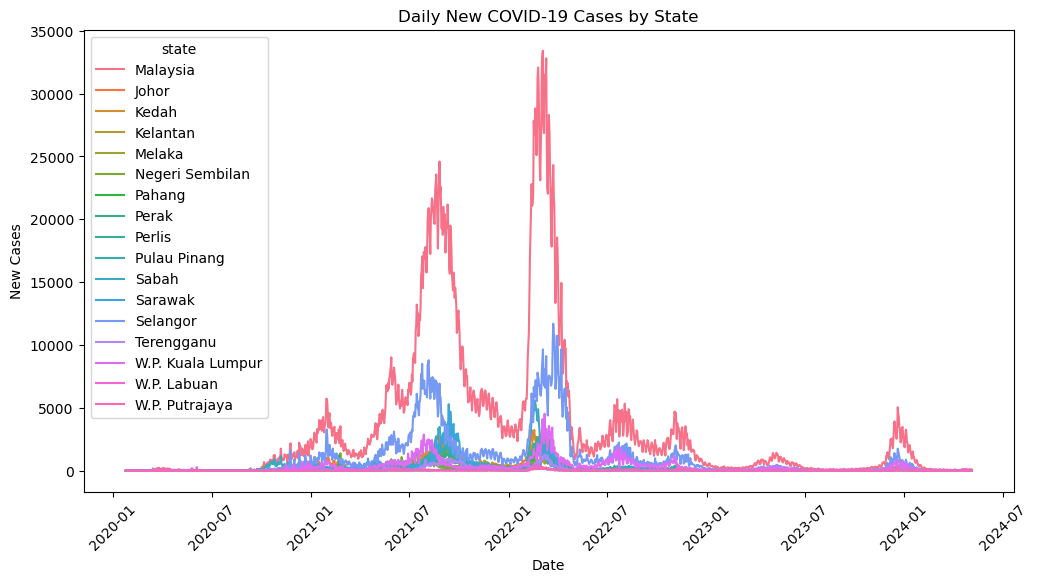

C:\Users\nur_e\AppData\Local\Temp\ipykernel_18588\204882657.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2_melted, x='date', y='cases', hue='age_group', ci=None)


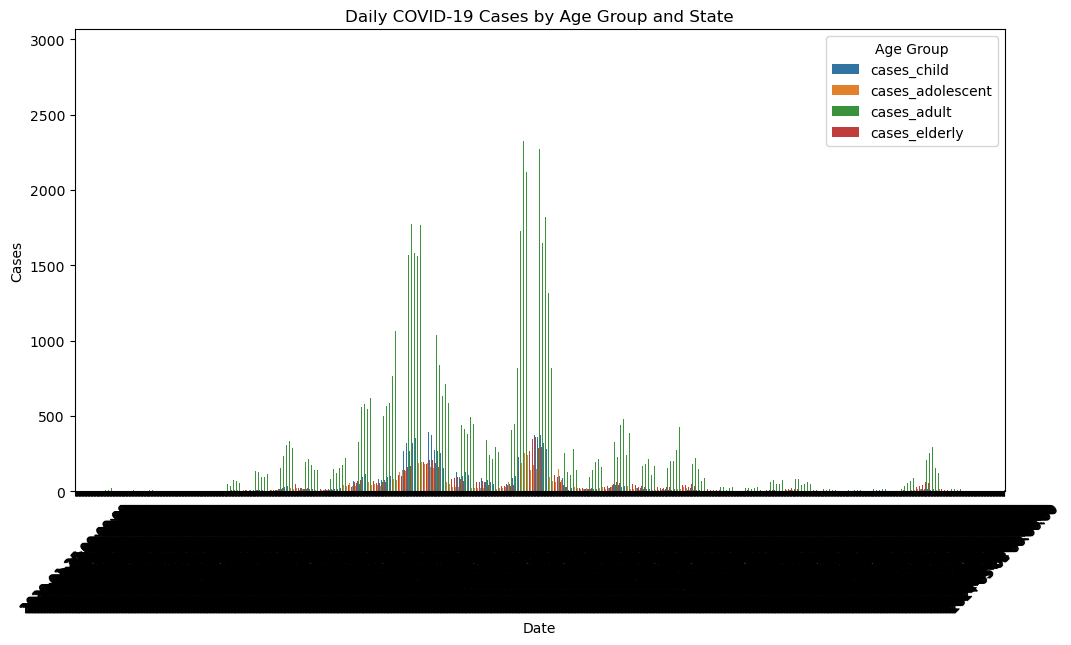

In [11]:
# Example 1: Line plot of new cases over time by state
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='date', y='cases_new', hue='state')
plt.title('Daily New COVID-19 Cases by State')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.show()

# Example 2: Stacked bar plot of cases by age group and state
age_groups = ['cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly']
df2_melted = df2.melt(id_vars=['date', 'state'], value_vars=age_groups, var_name='age_group', value_name='cases')

plt.figure(figsize=(12, 6))
sns.barplot(data=df2_melted, x='date', y='cases', hue='age_group', ci=None)
plt.title('Daily COVID-19 Cases by Age Group and State')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

C:\Users\nur_e\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nur_e\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


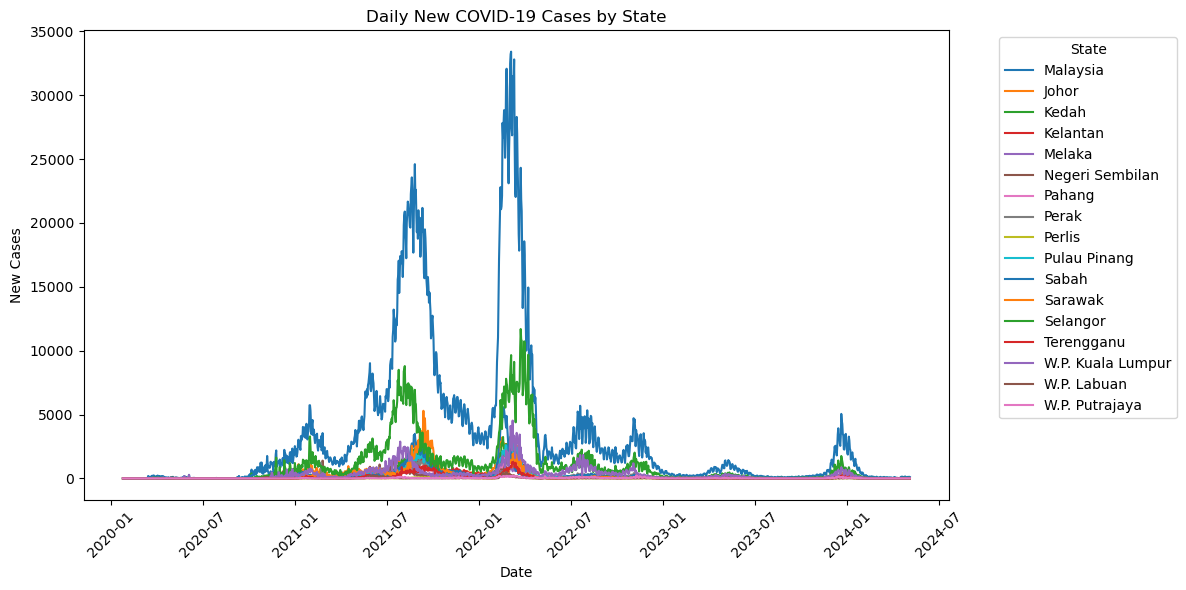

In [12]:
# Line plot of new cases over time by state
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='date', y='cases_new', hue='state', palette='tab10')
plt.title('Daily New COVID-19 Cases by State')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\nur_e\AppData\Local\Temp\ipykernel_18588\1578560745.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df2_melted, x='date', y='cases', hue='age_group', palette='tab10', estimator='sum', ci=None)
C:\Users\nur_e\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nur_e\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


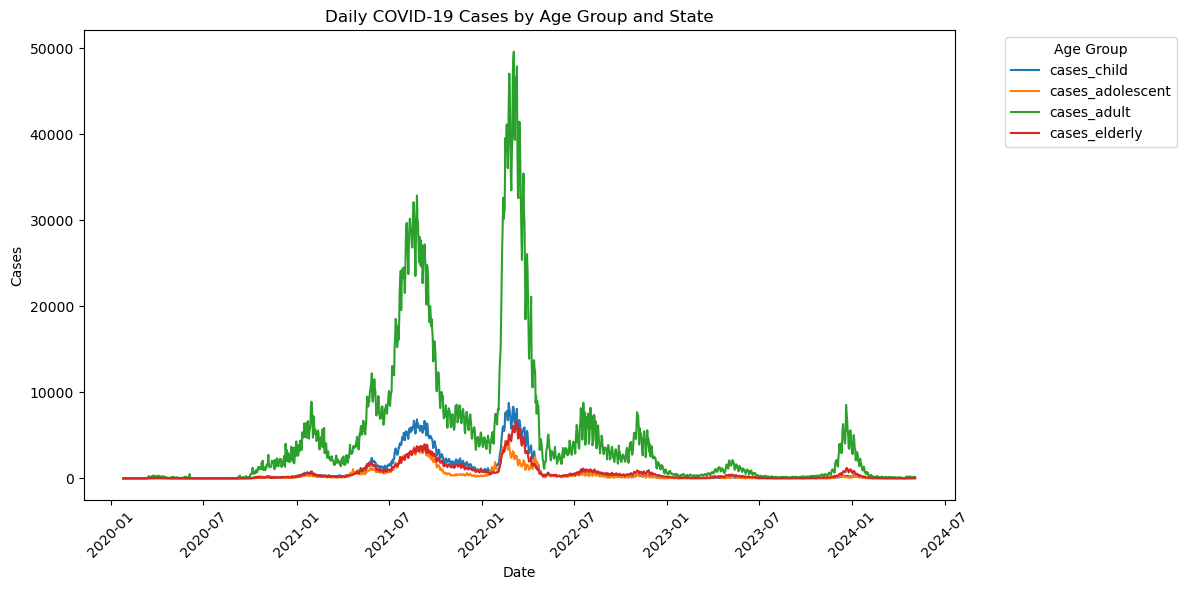

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df2 = pd.read_csv('covid_cases_age.csv')

# Convert 'date' column to datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Ensure the required columns for age groups exist
age_groups = ['cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly']
for age_group in age_groups:
    if age_group not in df2.columns:
        raise ValueError(f"The column '{age_group}' does not exist in df2. Please check the column names.")

# Melt the DataFrame to long format for visualization
df2_melted = df2.melt(id_vars=['date', 'state'], value_vars=age_groups, var_name='age_group', value_name='cases')

# Create a stacked area plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2_melted, x='date', y='cases', hue='age_group', palette='tab10', estimator='sum', ci=None)
plt.title('Daily COVID-19 Cases by Age Group and State')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


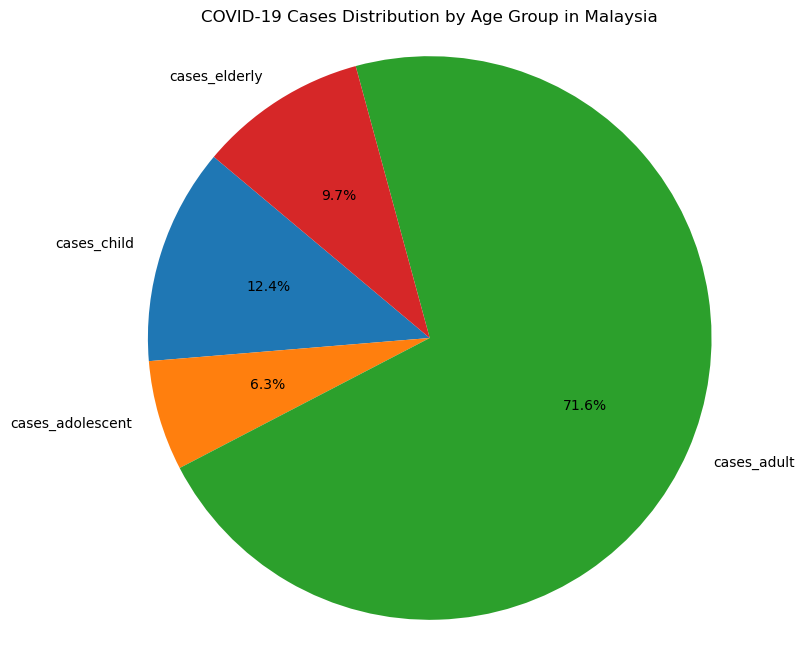

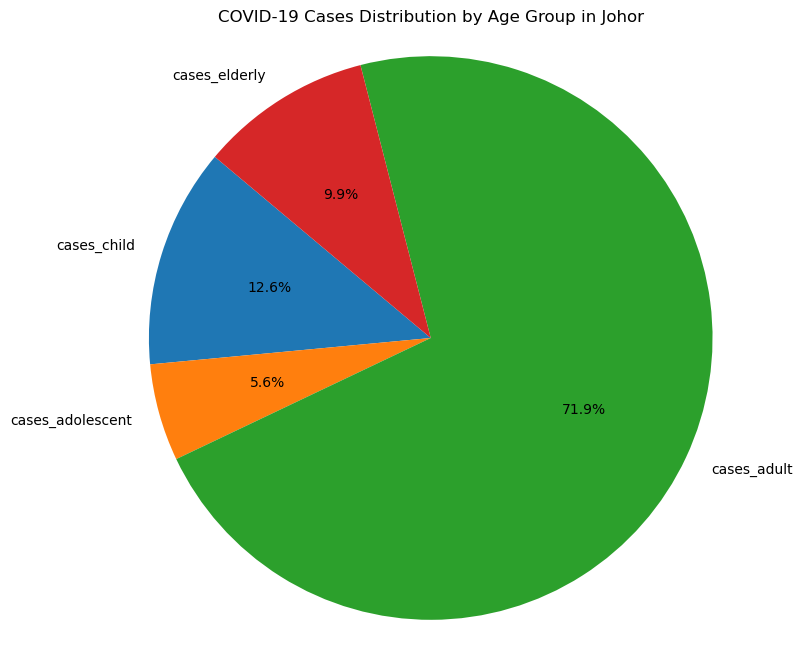

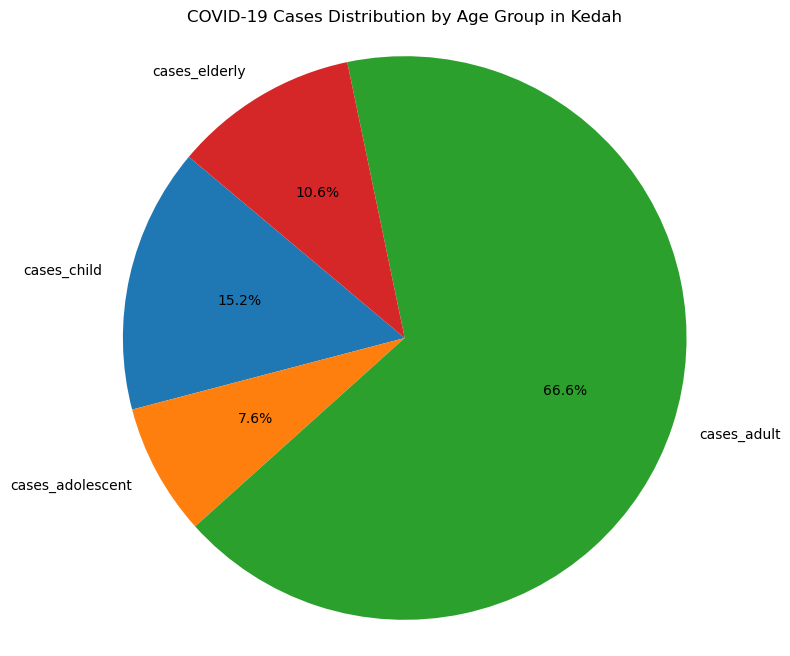

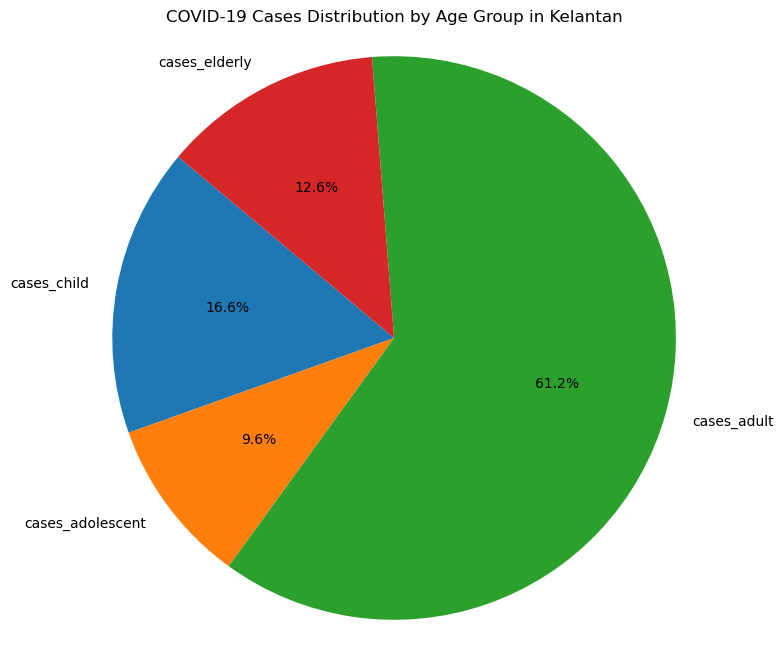

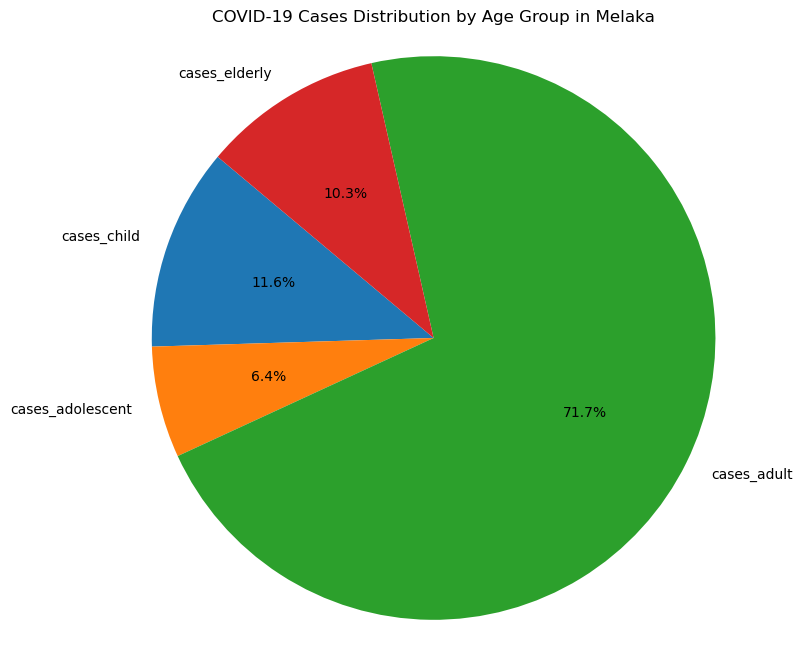

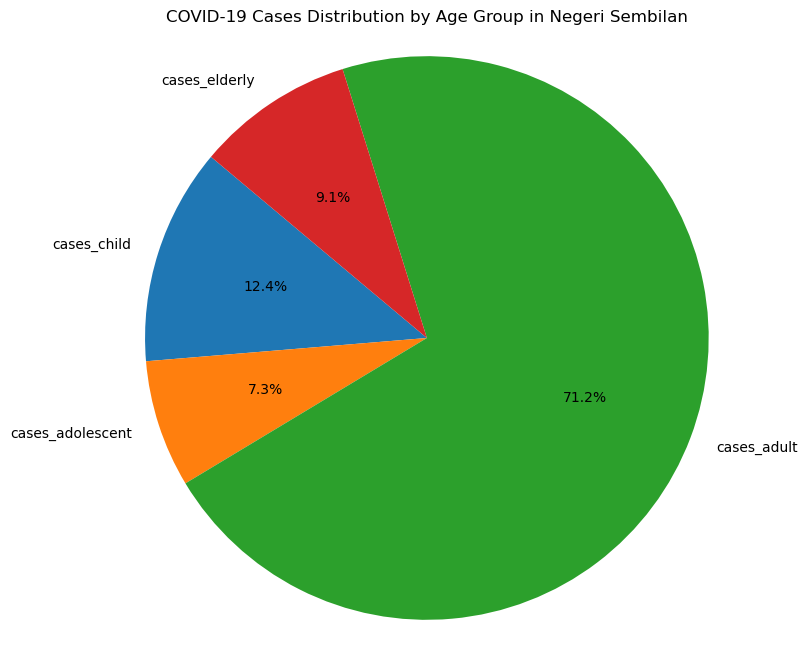

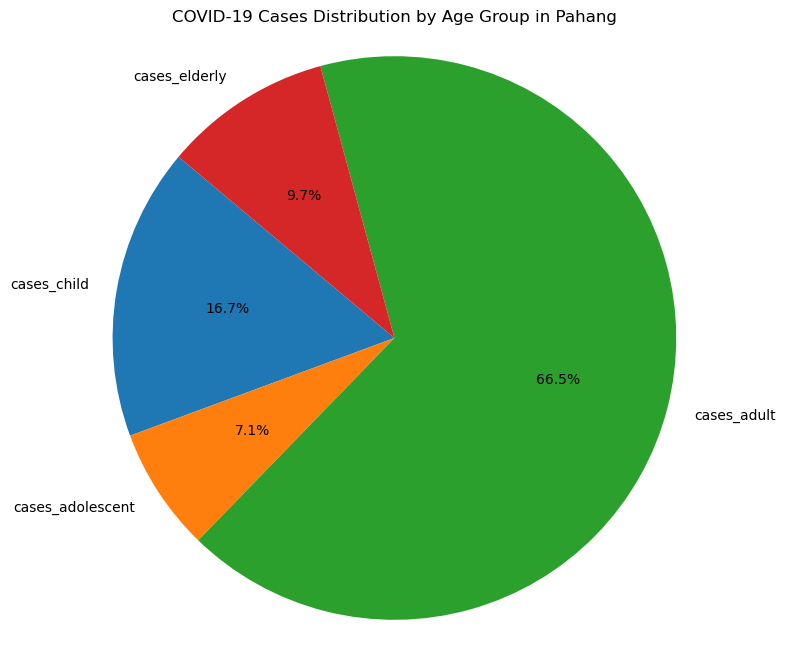

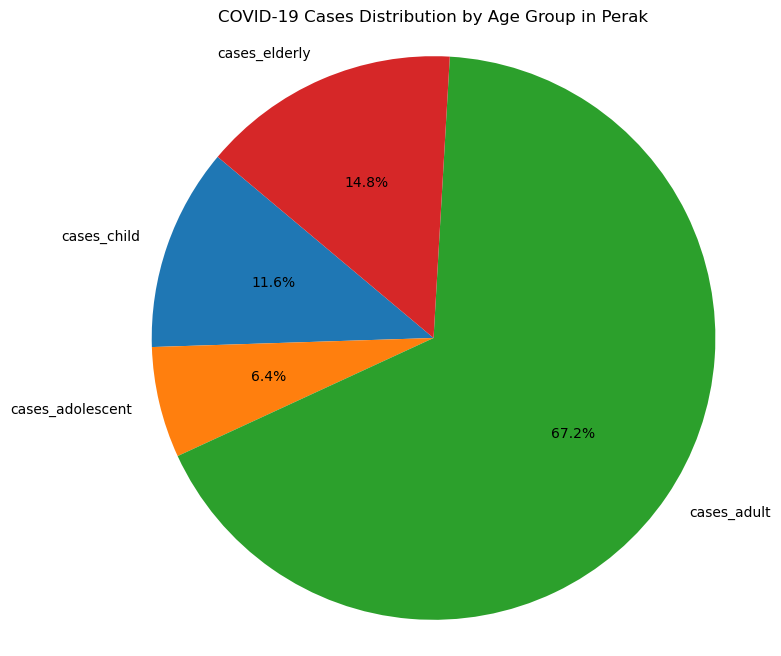

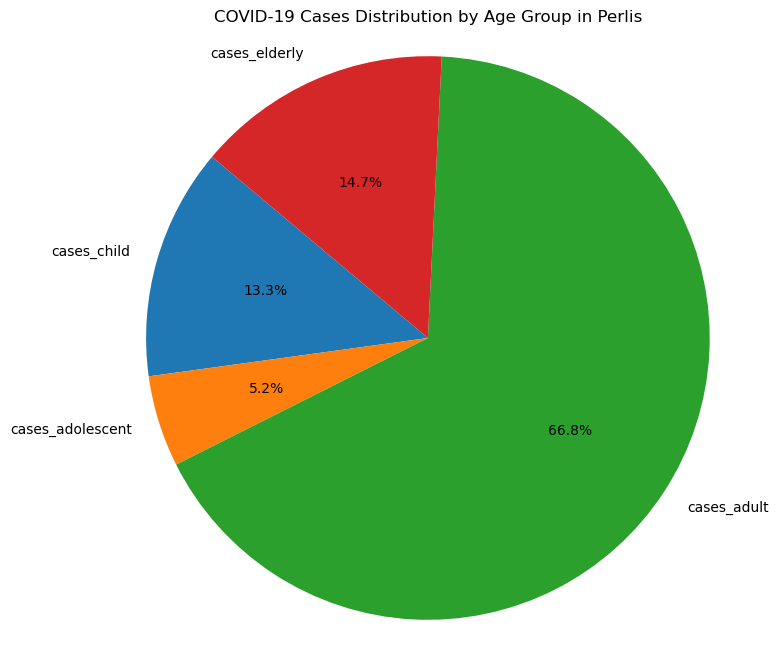

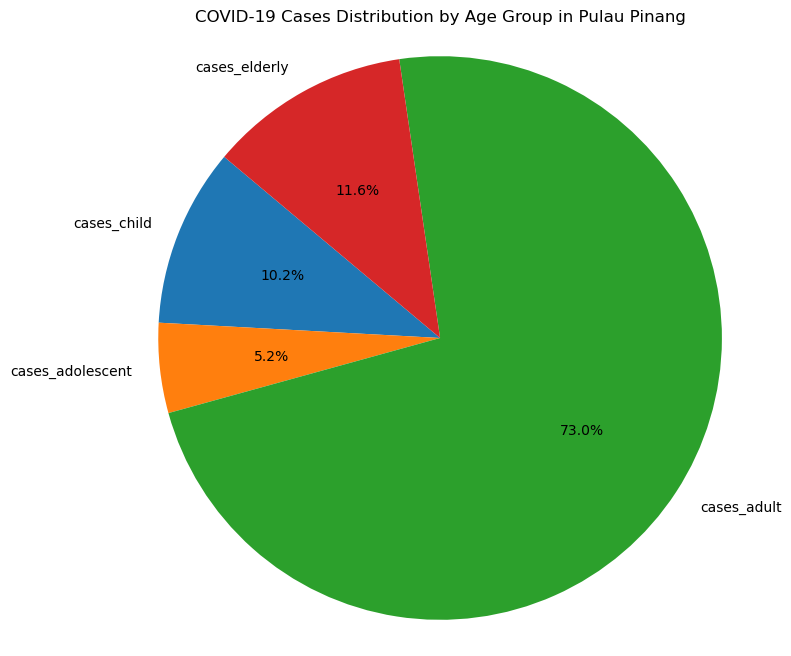

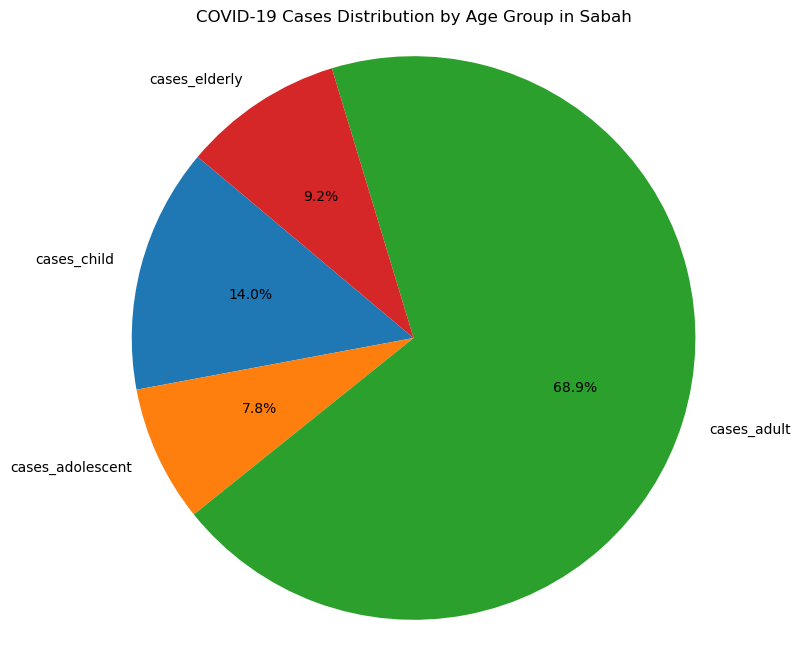

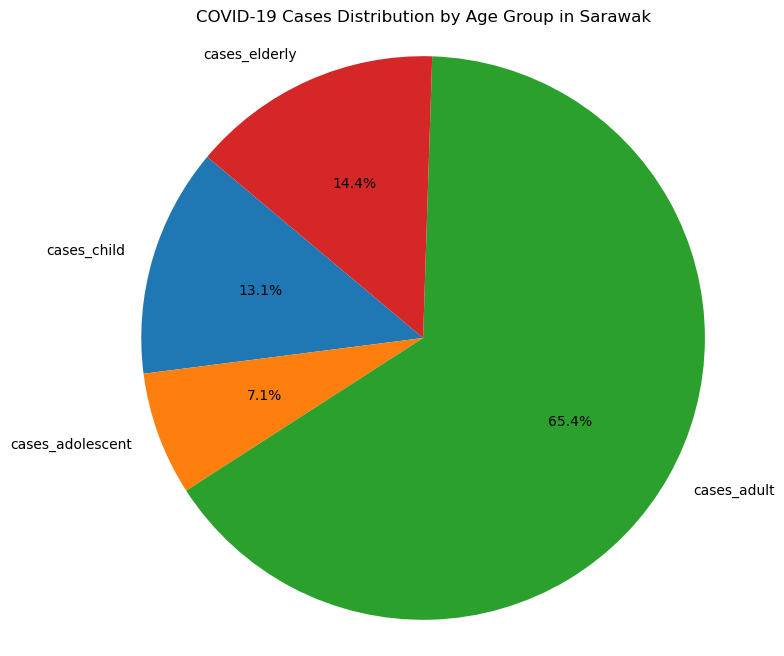

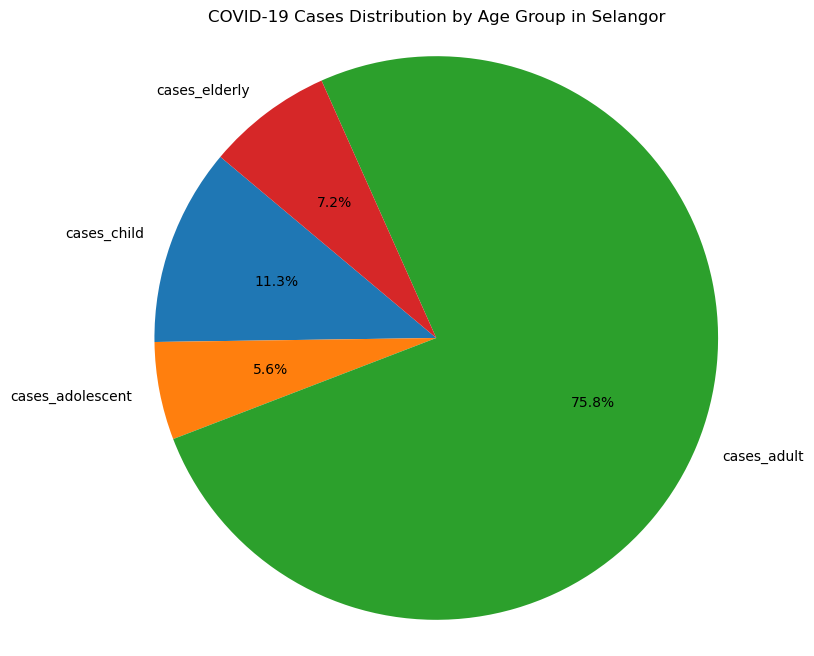

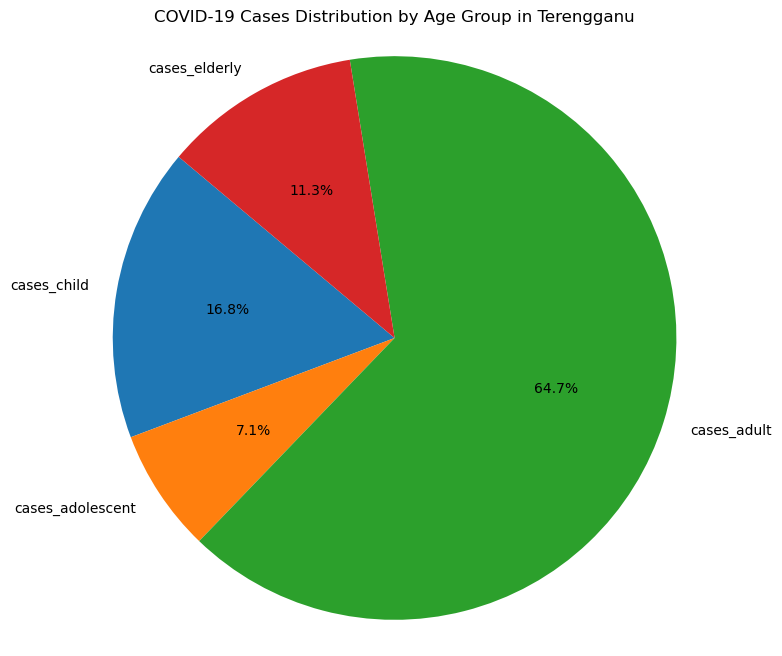

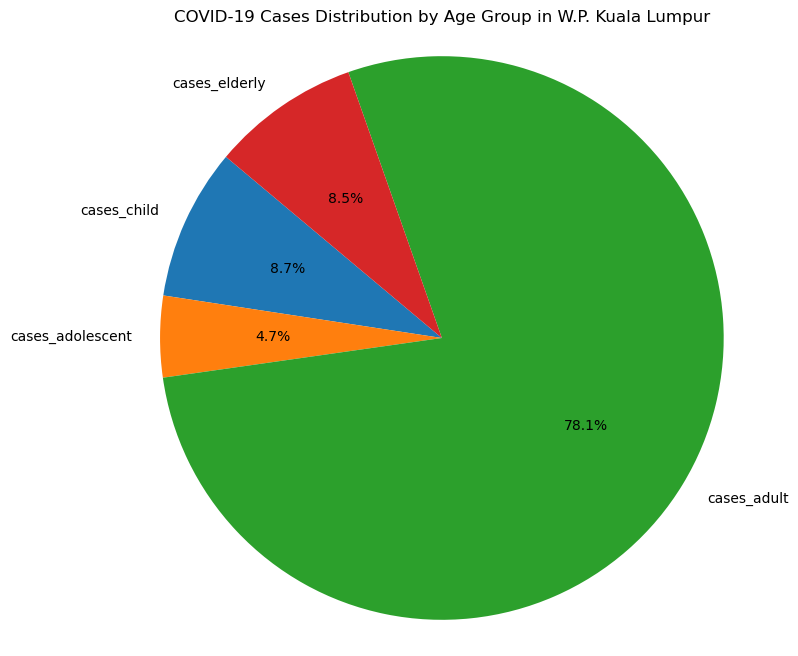

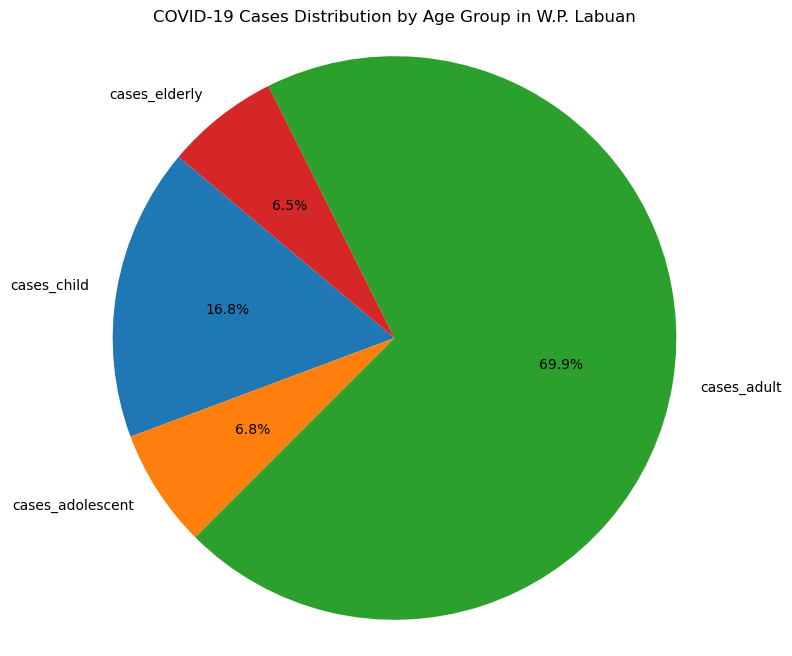

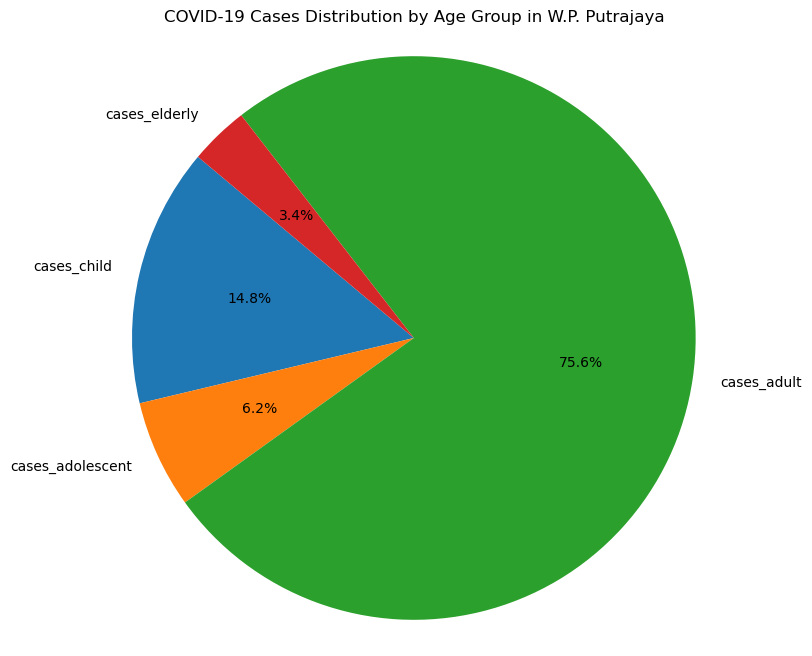

In [16]:
# Load the data
df2 = pd.read_csv('covid_cases_age.csv')

# Define a list of age groups
age_groups = ['cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly']

# Iterate over each state
for state in df2['state'].unique():
    # Filter data for the current state
    state_data = df2[df2['state'] == state]
    
    # Calculate total cases for each age group
    total_cases = state_data[age_groups].sum()
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(total_cases, labels=age_groups, autopct='%1.1f%%', startangle=140)
    plt.title(f'COVID-19 Cases Distribution by Age Group in {state}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()